In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Goal
# Compare batsmen RPI across both innings
# IPL 2016 onwards

In [3]:
deliveres = pd.read_csv("C:/Users/utkar/OneDrive/Desktop/Analytics/Data/IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("C:/Users/utkar/OneDrive/Desktop/Analytics/Data/IPL Matches 2008-2020.csv")

In [4]:
def ByInnings(df, inning_num): 
    
    df = df[df.inning == inning_num]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot']   = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne']   = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo']   = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour']  = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix']   = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = df.groupby('batsman').batsman_runs.sum().reset_index().rename(columns = {'batsman_runs' : 'runs'})
    balls = df.groupby('batsman').ball.count().reset_index().rename(columns = {'ball' : 'balls'})
    innings = df.groupby('batsman').id.nunique().reset_index().rename(columns = {'id' : 'innings'})
    dismissals = df.groupby('batsman').player_dismissed.count().reset_index().rename(columns = {'player_dismissed' : 'dismissals'})
    sixes = df.groupby('batsman').isSix.sum().reset_index().rename(columns = {'isSix' : 'sixes'}) 
    fours = df.groupby('batsman').isFour.sum().reset_index().rename(columns = {'isFour' : 'fours'})
    
   
    mega = pd.merge(runs, balls, on = 'batsman', how = 'left').merge(innings, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes , on = 'batsman')
    mega['RPI'] = mega['runs'] / mega['innings']
    return mega

In [5]:
del_df = deliveres.copy()

# Get Data from IPL 2016 onwards
del_df = del_df[(del_df.id > 980901)]

In [6]:
inning1_df = ByInnings(del_df, 1)
inning2_df = ByInnings(del_df, 2)
inning1_df.rename(columns={'RPI' : 'RPI_1stInning'}, inplace=True)
inning2_df.rename(columns={'RPI' : 'RPI_2ndInning'}, inplace=True)
inning1_df = inning1_df[inning1_df.innings >= 10]
inning2_df = inning2_df[inning2_df.innings >= 10]
inning1_df = inning1_df[['batsman', 'RPI_1stInning']]
inning2_df = inning2_df[['batsman', 'RPI_2ndInning']]

comb = pd.merge(inning1_df, inning2_df, on = 'batsman')

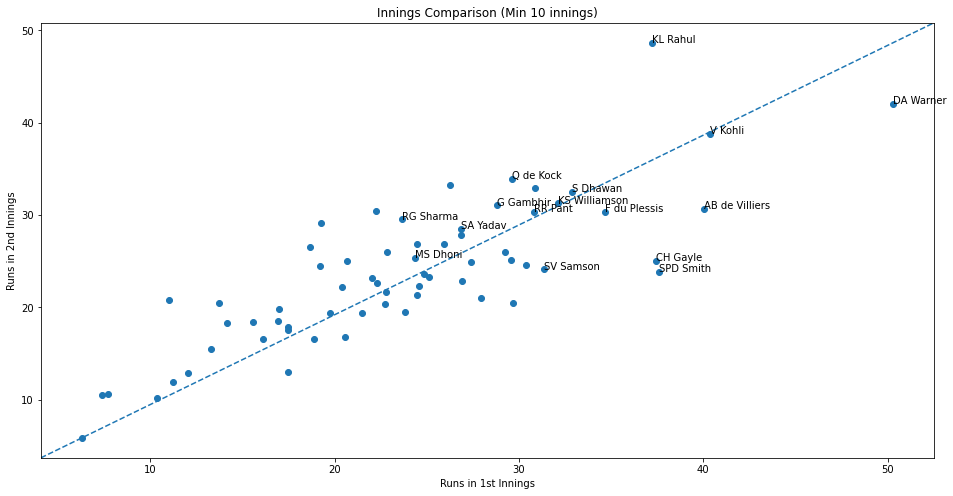

In [7]:
f, ax = plt.subplots(figsize=(16, 8))

# Annotate some of the best batsmen to see how they compare
selected_players = ['V Kohli' , 'MS Dhoni' , 'AB de Villiers' , 'CH Gayle', 
 'DA Warner' , 'RG Sharma' , 'S Dhawan', 'G Gambhir', 'KL Rahul' , 'KS Williamson' , 
  'RR Pant' , 'Q de Kock', 'SA Yadav', 'SPD Smith', 'SV Samson', 'F du Plessis']

annotations = list(comb['batsman'])


for i,j in enumerate(annotations): 
    if j in selected_players: 
        plt.annotate(j, (comb['RPI_1stInning'][i], comb['RPI_2ndInning'][i]))
   
# Draw a diagonal line for segregation
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--')
        
plt.scatter(comb['RPI_1stInning'], comb['RPI_2ndInning'])
plt.xlabel("Runs in 1st Innings")
plt.ylabel("Runs in 2nd Innings")
plt.title("Innings Comparison (Min 10 innings)")
plt.show()

In [8]:
comb.head(40)

,batsman,RPI_1stInning,RPI_2ndInning
0,AB de Villiers,40.054054,30.653846
1,AD Russell,29.680000,20.473684
2,AJ Finch,19.280000,29.142857
3,AM Rahane,27.419355,24.909091
4,AR Patel,12.068966,12.826087
5,AT Rayudu,26.833333,27.833333
6,BA Stokes,18.666667,26.545455
7,BB McCullum,24.875000,23.647059
8,C de Grandhomme,13.300000,15.454545
9,CA Lynn,30.882353,32.904762
